#влияние условий жизни учащихся на их успеваемость по математике

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок# 

Дана база данных учащихся от 15 до 22 лет 

In [174]:
school = pd.read_csv('stud_math.csv')

In [175]:
school.head(5)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [176]:
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

в имеющемся датасете 13 числовых столбцов и 17 строковых

однако по сути число числовые столбцы это score,  absences,  age. Все остальные можно считать как номинативные. Удалим столбец studytime, granular

In [182]:
school.drop(['studytime, granular'], inplace = True, errors = 'ignore', axis=1)school.head(5)


In [183]:
school.head(5)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [251]:
#преобразуем тип данных на  категориальный кроме столбцов  score,  absences,  age.
cat_cols = [col for col in school.columns if col not in ['score', 'absences', 'age']]
for col in cat_cols:
    school[col] = school[col].astype('category') 

In [185]:
school.isna().sum()
#пропущенных значений нет только в первых трех.

school         0
sex            0
age            0
address       17
famsize       27
Pstatus       45
Medu           3
Fedu          24
Mjob          19
Fjob          36
reason        17
guardian      31
traveltime    28
studytime      7
failures      22
schoolsup      9
famsup        39
paid          40
activities    14
nursery       16
higher        20
internet      34
romantic      31
famrel        27
freetime      11
goout          8
health        15
absences      12
score          6
dtype: int64

In [186]:
def missing_values_table(df):
        # всего пропущенных значений
        mis_val = df.isnull().sum()
        
        # пропущено значений в процентах
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # сделаем таблицу с результатами
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # переименуем колонки
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Пропущенные значения', 1 : '% от общего количества'})
        
        # сортировка по процентам от большего к меньшему
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% от общего количества', ascending=False).round(1)
        
        # отобразим резюме
        print ("Датафрейм имеет " + str(df.shape[1]) + " колонок.\n"      
            "Имеется " + str(mis_val_table_ren_columns.shape[0]) +
              " колонок с пропущенными значениями.")
        
        # возвращает датафрейм с пропущенными значениями
        return mis_val_table_ren_columns

In [187]:
missing_values_table(school)

Датафрейм имеет 29 колонок.
Имеется 26 колонок с пропущенными значениями.


,Пропущенные значения,% от общего количества
Pstatus,45,11.4
paid,40,10.1
famsup,39,9.9
Fjob,36,9.1
internet,34,8.6
romantic,31,7.8
guardian,31,7.8
traveltime,28,7.1
famrel,27,6.8
famsize,27,6.8


Во всех столбцах пропущенных значений менее 35%, столбцы удалять не будем

In [188]:
#заменим в числовых столбцах  пропущенные значения на медианные
import numpy as np
for col in school.select_dtypes(include=np.number):
    school[col] = school[col].fillna(school[col].median())

In [214]:
school.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      358 non-null    category
 1   sex         358 non-null    category
 2   age         358 non-null    int64   
 3   address     341 non-null    category
 4   famsize     334 non-null    category
 5   Pstatus     319 non-null    category
 6   Medu        355 non-null    category
 7   Fedu        336 non-null    category
 8   Mjob        342 non-null    category
 9   Fjob        325 non-null    category
 10  reason      342 non-null    category
 11  guardian    328 non-null    category
 12  traveltime  331 non-null    category
 13  studytime   351 non-null    category
 14  failures    339 non-null    category
 15  schoolsup   349 non-null    category
 16  famsup      326 non-null    category
 17  paid        321 non-null    category
 18  activities  344 non-null    category
 19  nursery 

оценим выбросы в числовых столбцах score и absences а потом удалим их


count    395.000000
mean      52.303797
std       22.746314
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

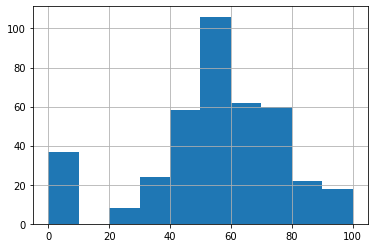

In [189]:
school.score.hist()
school.score.describe()

In [190]:
IQR = school.score.quantile(0.75) - school.score.quantile(0.25)
score_perc25 = school.score.quantile(0.25)
score_perc75 = school.score.quantile(0.75)
# удалим выбросы
school = school[(school['score'] > (score_perc25 - 1.5 * IQR)) &
                (school['score'] < (score_perc75 + 1.5 * IQR))]

count    395.000000
mean       7.179747
std       23.111967
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

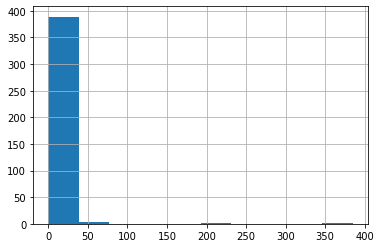

In [191]:
school.absences.hist()
school.absences.describe()

In [193]:
IQR = school.absences.quantile(0.75) - school.absences.quantile(0.25)
absences_perc25 = school.absences.quantile(0.25)
absences_perc75 = school.absences.quantile(0.75)
# удалим выбросы
school = school[(school['absences'] > (absences_perc25 - 1.5 * IQR)) &
                (school['absences'] < (absences_perc75 + 1.5 * IQR))]

Проведем корреляционный анализ

In [194]:
school.corr()

,age,absences,score
age,1.000000,0.093571,-0.159506
absences,0.093571,1.000000,0.131240
score,-0.159506,0.131240,1.000000


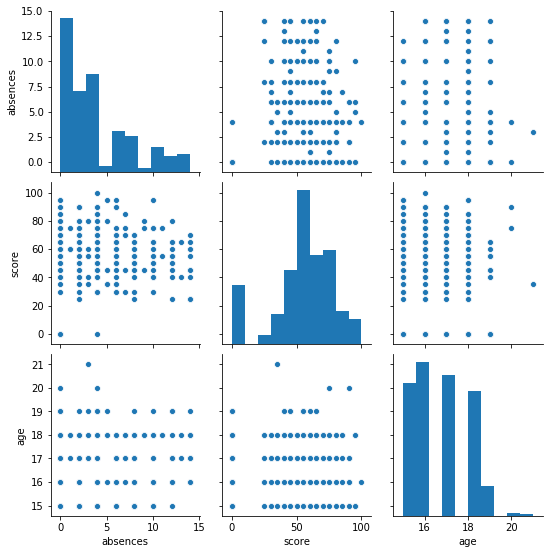

In [195]:
sns.pairplot(school, vars=[ "absences", 'score', 'age' ])

 положительная корреляция параметра absences и rating может говорить о том, что оценка действительно зависит от количества пропущенных занятий. Переменную Age мы можем исключить

In [196]:
school.nunique()

school         2
sex            2
age            7
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           6
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         6
freetime       5
goout          5
health         5
absences      15
score         17
dtype: int64

Обращает на себя внимание завышенное количество уникальных значений в столбцах Fedu, famrel

In [262]:
display(pd.DataFrame(school.Fedu.value_counts()))
#оценка 40 - явная ошибка, удалим ее

,Fedu
2.0,97
3.0,87
4.0,78
1.0,71
0.0,2


In [261]:
school.Fedu

0      4.0
1      1.0
2      1.0
3      2.0
4      3.0
      ... 
389    1.0
391    1.0
392    1.0
393    2.0
394    1.0
Name: Fedu, Length: 358, dtype: category
Categories (5, float64): [0.0, 1.0, 2.0, 3.0, 4.0]

In [260]:
school.Fedu.cat.remove_categories([40], inplace = True)

In [266]:
school.famrel

0      4.0
1      5.0
2      4.0
3      3.0
4      4.0
      ... 
389    1.0
391    2.0
392    5.0
393    4.0
394    3.0
Name: famrel, Length: 358, dtype: category
Categories (5, float64): [1.0, 2.0, 3.0, 4.0, 5.0]

In [265]:
display(pd.DataFrame(school.famrel.value_counts()))

,famrel
4.0,165
5.0,92
3.0,54
2.0,15
1.0,7


In [264]:
school.famrel.cat.remove_categories([-1.0], inplace = True)

проведем анализ номинативных переменных

In [267]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=school.loc[school.loc[:, column].isin(school.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

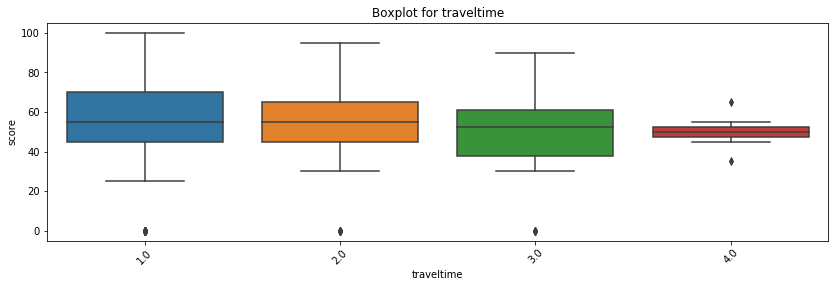

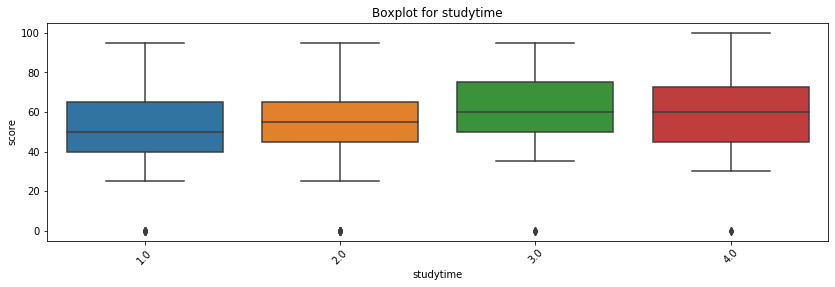

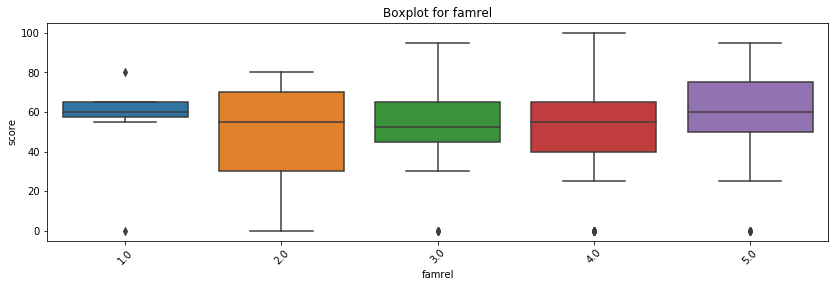

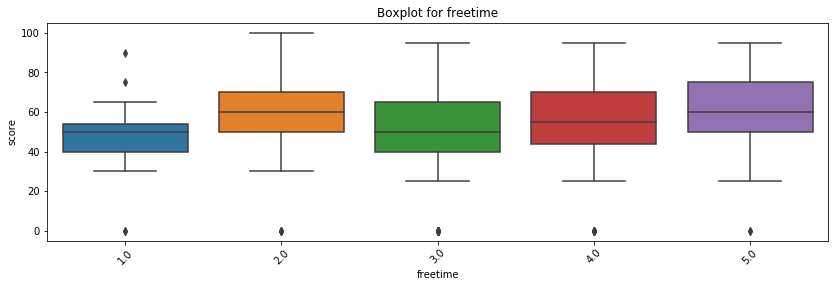

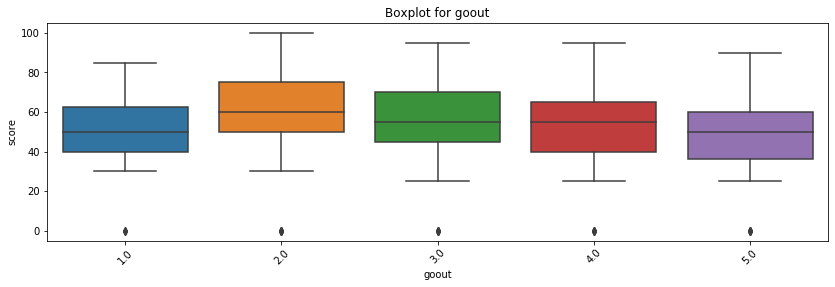

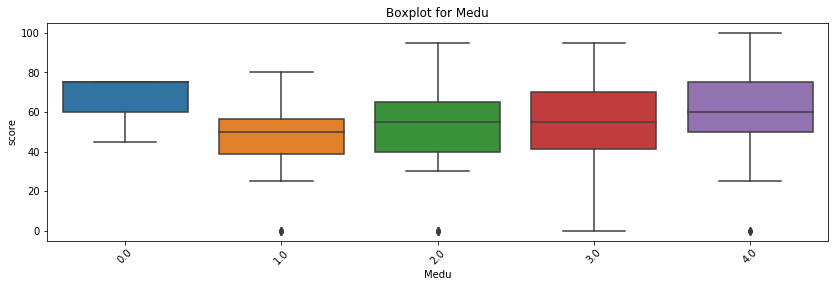

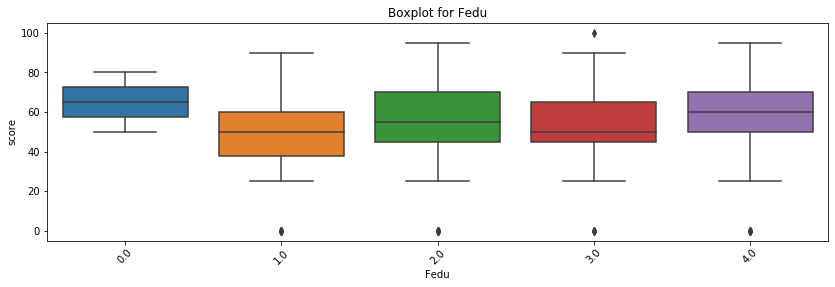

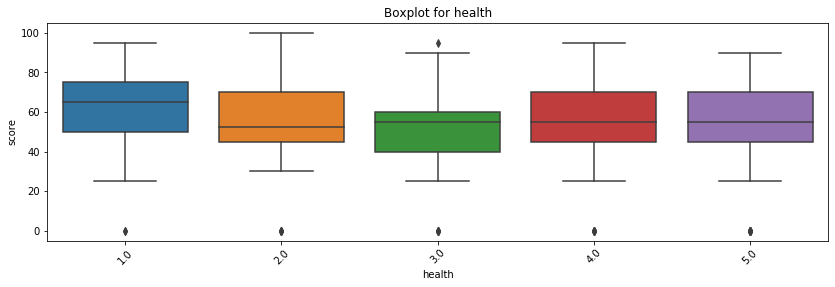

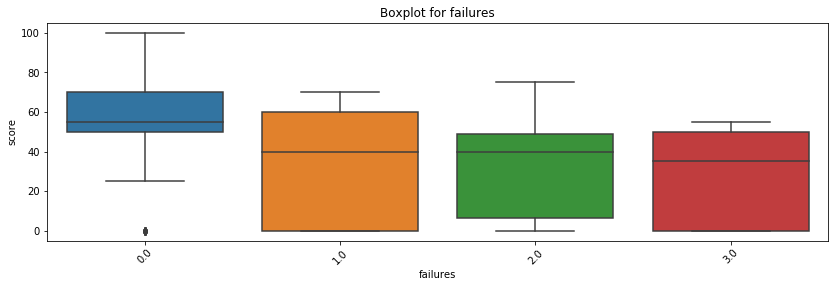

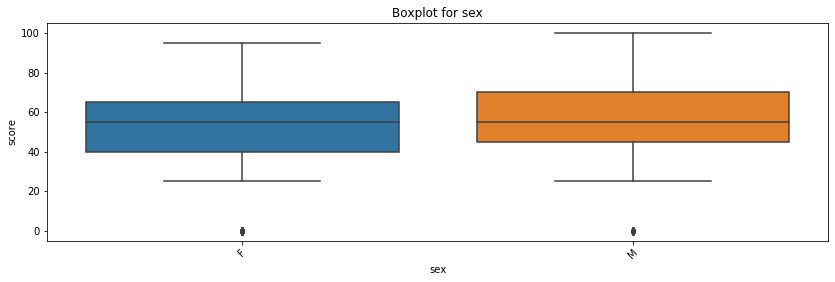

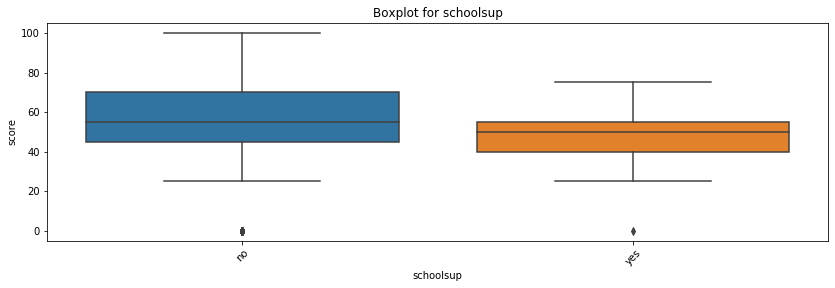

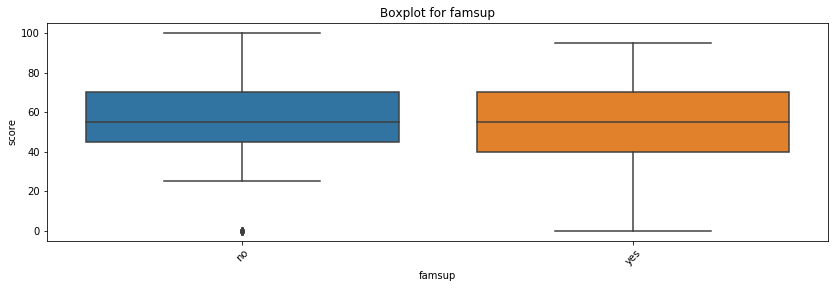

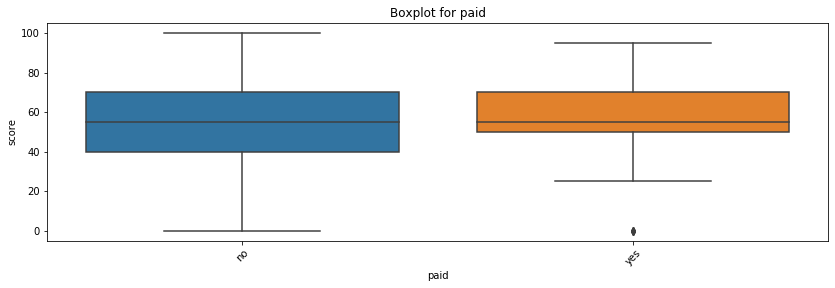

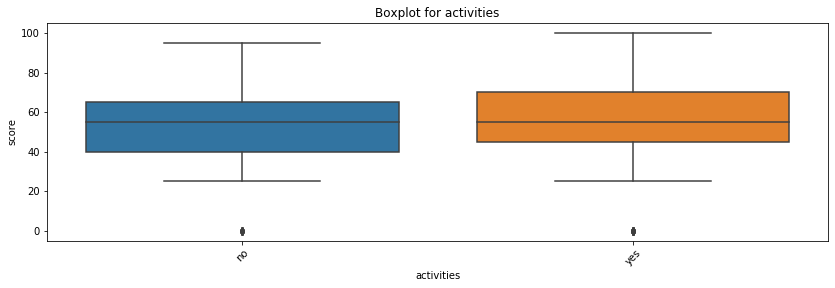

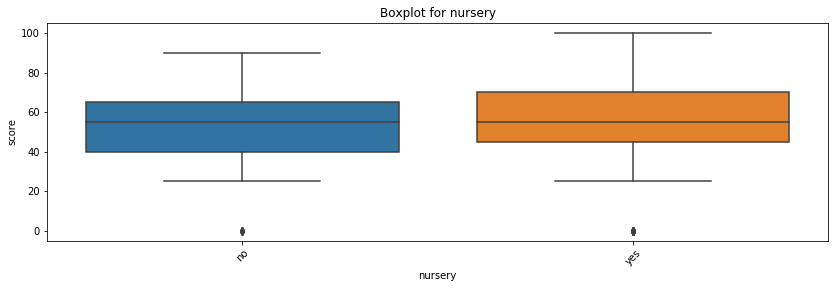

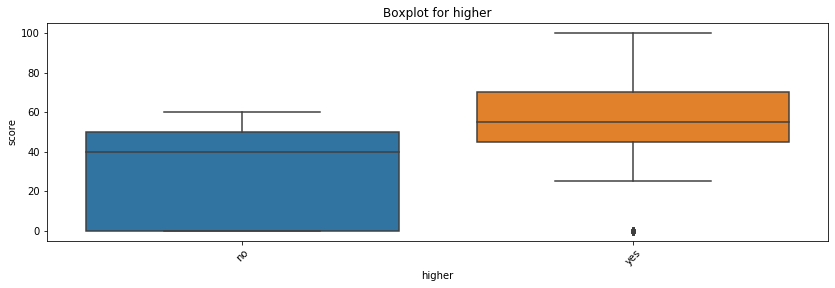

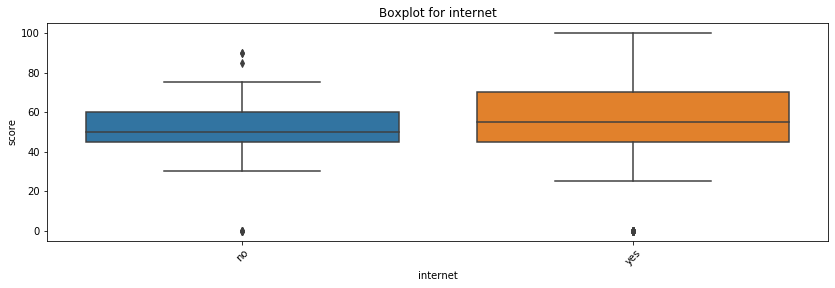

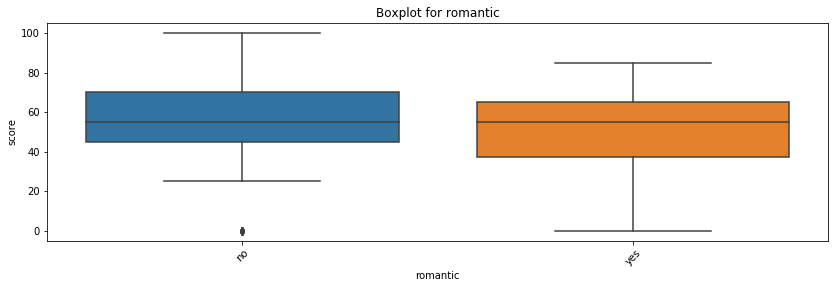

In [268]:
for col in ["traveltime", 'studytime', "famrel", "freetime", "goout", "Medu", "Fedu", "health", 
            'failures', 'sex', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
      get_boxplot(col)

In [269]:
def get_stat_dif(column):
    cols = school.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(school.loc[school.loc[:, column] == comb[0], 'score'], 
                        school.loc[school.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
for col in ["traveltime", "studytime", "famrel", "freetime", "goout", "Medu", "Fedu", "health", 
            'failures', 'sex', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [270]:
school_model = school.loc[:, ['Medu', 'failures', 'sex', 'paid', 'higher', 'romantic', 'absences']]
school_model.head()

,Medu,failures,sex,paid,higher,romantic,absences
0,4.0,0.0,F,no,yes,no,6.0
1,1.0,0.0,F,no,yes,no,4.0
2,1.0,3.0,F,NaN,yes,NaN,10.0
3,4.0,0.0,F,yes,yes,yes,2.0
4,3.0,0.0,F,yes,yes,no,4.0


В данных достаточно мало пустых значений
Выбросы найдены только в столбцах с c оценками и отсутствиями, что позволяет сделать вывод о том, что данные достаточно чистые.
Положительная корреляция параметра score и absences может говорить о том, c увеличением прогулов оценка снижается
Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это Medu', 'failures', 'sex', 'paid', 'higher', 'romantic'